In [31]:
class isingModel:
    import numpy as np
    from PIL import Image
    from ipywidgets import interact    
    
    def __init__(self, N, M):
        self.N = N
        self.M = M
        self.field = np.random.choice([-1, 1], size=(self.N, self.M))
        self.images = [self.field]

    def display_spin_field(self):
        return Image.fromarray(np.uint8((self.field + 1) * 0.5 * 255))

    def ising_step(self, beta=0.4):
        N, M = self.field.shape
        for n_offset in range(2):
            for m_offset in range(2):
                for n in range(n_offset, N, 2):
                    for m in range(m_offset, M, 2):
                        _ising_update(self.field, n, m, beta)
        return self.field

    def _ising_update(self, n, m, beta):
        total = 0
        N, M = self.field.shape
        for i in range(n-1, n+2):
            for j in range(m-1, m+2):
                if i == n and j == m:
                    continue
                total += self.field[i % N, j % M]
        dE = 2 * self.field[n, m] * total
        if dE <= 0:
            self.field[n, m] *= -1
        elif np.exp(-dE * beta) > np.random.rand():
            self.field[n, m] *= -1

    def display_ising_sequence(self):
        return interact(_show)            

    def _show(self):
        frame=(0, len(self.images) - 1)
        return display_spin_field(self.images[frame])    
    
    def animation(self, interaction):
        for i in range(interaction):
            self.images.append(ising_step(self.images[-1].copy()))
        display_ising_sequence(self.images)

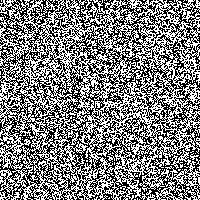

In [35]:
lattice = isingModel(200,200)
lattice.display_spin_field()

In [37]:
lattice.animation(100)

interactive(children=(IntSlider(value=55, description='frame', max=110), Output()), _dom_classes=('widget-inte…